In [1]:
import numpy as np
from numpy import loadtxt
from statistics import stdev
import matplotlib.pyplot as plt,mpld3
import pprint
import pandas as pd
from pprint import pprint
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [3]:
from numpy import genfromtxt

In [4]:
activation_func1="selu"
# activation_func2=eval("tf.keras.layers.LeakyReLU(alpha=0.2)")
activation_func2="selu"


In [5]:

my_data = genfromtxt('combined_all_stripped.csv', delimiter=',')

In [6]:
# BigX=loadtxt("stripper_train_3.txt")
BigXO=genfromtxt('combined_all_stripped.csv', delimiter=',')
BigX=BigXO
firstseg=BigX[1:1946,:]
secondseg=BigX[2040:,:]

BigX=np.concatenate((firstseg,secondseg),axis=0)
BigX1b=BigX
# for i in range(2,14):
#     next=loadtxt("stripper_data_"+str(i)+"b.txt")
#     BigX=np.concatenate((BigX,next),axis=0)

#BigX1b=np.concatenate((BigX1b,BigX2b),axis=0)
#print(BigX)
#print(type(BigX))
dim=len(BigX[0]) #number of cols
num_examples_train=len(BigX)
print(dim,num_examples_train)

# dim2b=len(BigX2b[0]) #number of cols
# num_examples_train2b=len(BigX2b)
# print(dim2b,num_examples_train2b)
# TestX=loadtxt("process_data_testing.txt")
# num_examples_test=len(TestX)
#print(dim,num_examples_test)
BigX_org=BigX
pprint(BigX)
# pprint(BigXO)

76 3744
array([[11.042638,  0.855303,  0.022889, ..., 20.057545, 20.129576,
        20.835932],
       [11.04287 ,  0.855167,  0.032582, ..., 20.054728, 20.127306,
        20.836946],
       [11.042726,  0.855184,  0.022889, ..., 20.058846, 20.146317,
        20.836784],
       ...,
       [10.58028 ,  0.371116,  0.022889, ..., 17.203693, 17.458914,
        18.385456],
       [10.580399,  0.371049,  0.022889, ..., 17.204838, 17.453979,
        18.389811],
       [10.580379,  0.370978,  0.022889, ..., 17.190466, 17.452463,
        18.394085]])


In [7]:
# def normaliser(genericData):
#     #normalising
#     min_indices=np.amin(genericData,axis=0)
#     #print(min_indices)
#     max_indices=np.amax(genericData,axis=0)
#     #print(max_indices)
#     diff_train=max_indices-min_indices
#     #print(diff_train)
#     check=(genericData-min_indices)/diff_train
#     #print(check)
#     data_normalised= tf.cast(check, tf.float32)
#     #print(train_data_normalised)
#     #print(type(train_data_normalised))
#     return data_normalised

'''
I will try to scale in a robust fashion since data may contain plenty of anomalies
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
'''
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [8]:
import plotly.express as px

In [9]:
# transformerRS = RobustScaler().fit(BigX)
# transformerRS.transform(BigX)
scaling = RobustScaler()
BigX=scaling.fit_transform(BigX)
#RobustScaler(quantile_range=(25, 75)).fit_transform(BigX)
pprint(BigX)
pprint(BigX_org)
if(np.array_equal(BigX_org, BigX)):
    print("robust scaler not useful")

array([[ 0.13404159,  0.05510907,  0.        , ..., -0.34571197,
        -0.38204148, -0.41990473],
       [ 0.1344417 ,  0.05482392,  0.05456587, ..., -0.34656914,
        -0.38272316, -0.41960783],
       [ 0.13419335,  0.05485956,  0.        , ..., -0.34531609,
        -0.37701418, -0.41965526],
       ...,
       [-0.66335938, -0.96009423,  0.        , ..., -1.21409386,
        -1.18403774, -1.13741304],
       [-0.66315415, -0.96023471,  0.        , ..., -1.21374546,
        -1.18551972, -1.13613788],
       [-0.66318864, -0.96038357,  0.        , ..., -1.21811863,
        -1.18597497, -1.13488644]])
array([[11.042638,  0.855303,  0.022889, ..., 20.057545, 20.129576,
        20.835932],
       [11.04287 ,  0.855167,  0.032582, ..., 20.054728, 20.127306,
        20.836946],
       [11.042726,  0.855184,  0.022889, ..., 20.058846, 20.146317,
        20.836784],
       ...,
       [10.58028 ,  0.371116,  0.022889, ..., 17.203693, 17.458914,
        18.385456],
       [10.580399,  0.3

In [10]:
# print(train_data_normalised)
#setting up parameters for autoencoder
nb_epoch = 3000
batch_size = 32
input_dim = dim #num of columns,6
#encoding_dim = 60
hidden_dim_1 = 65
hidden_dim_2= 55
bottleneck = 16
learning_rate = 1e-11
print("{:.15f}".format(learning_rate))

0.000000000010000


In [11]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

In [12]:
# #Encoder
# encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
# #encoder=tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

#encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
# encoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(input_layer)
# encoder=tf.keras.layers.Dropout(0.2)(encoder)
# encoder=tf.keras.layers.Dense(hidden_dim_2,activation="relu")(encoder)
encoder= tf.keras.layers.Dense(bottleneck,activation=activation_func1)(input_layer)
# # encoder=  tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_2, activation="relu")(encoder)

In [13]:
# # Decoder
# # decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# # decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder)
# decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# #decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(decoder)
# decoder = tf.keras.layers.Dense(input_dim, activation="relu")(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation=activation_func2)(encoder)
# decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(decoder)
# #decoder=tf.keras.layers.Dense(encoding_dim,activation="relu")(decoder)
# decoder=tf.keras.layers.Dense(input_dim,activation="relu")(decoder)
# justcheck=tf.keras.layers.Dense(6,activation="relu")(input_layer)

In [14]:
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                1232      
_________________________________________________________________
dense_1 (Dense)              (None, 76)                1292      
Total params: 2,524
Trainable params: 2,524
Non-trainable params: 0
_________________________________________________________________


In [15]:
# # callbacks for checkpoints and early stopping
# cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# # define our early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.0001,
#     patience=10,
#     verbose=1, 
#     mode='min',
#     restore_best_weights=True
#     )

In [16]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [17]:
history = autoencoder.fit(BigX, BigX,
                    epochs=nb_epoch,
                    shuffle=True,
                    ).history

Epoch 1/3000
117/117 [==============================] - 0s 399us/step - loss: 1.6752 - accuracy: 0.1079
Epoch 2/3000
117/117 [==============================] - 0s 378us/step - loss: 0.5730 - accuracy: 0.4427
Epoch 3/3000
117/117 [==============================] - 0s 378us/step - loss: 0.2573 - accuracy: 0.5256
Epoch 4/3000
117/117 [==============================] - 0s 387us/step - loss: 0.1338 - accuracy: 0.5527
Epoch 5/3000
117/117 [==============================] - 0s 464us/step - loss: 0.0946 - accuracy: 0.5777
Epoch 6/3000
117/117 [==============================] - 0s 524us/step - loss: 0.0709 - accuracy: 0.6159
Epoch 7/3000
117/117 [==============================] - 0s 378us/step - loss: 0.0539 - accuracy: 0.6495
Epoch 8/3000
117/117 [==============================] - 0s 378us/step - loss: 0.0445 - accuracy: 0.6922
Epoch 9/3000
117/117 [==============================] - 0s 404us/step - loss: 0.0364 - accuracy: 0.7526
Epoch 10/3000
117/117 [==============================] - 0s 507u

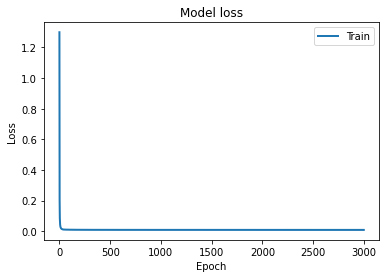

In [18]:
plt.plot(history['loss'], linewidth=2, label='Train')
#plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [19]:
train_x_predictions = autoencoder.predict(BigX)
#print(test_data_normalised,test_x_predictions)
#print(TestX)
mse = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)
#print(mse)
#print(type(mse))

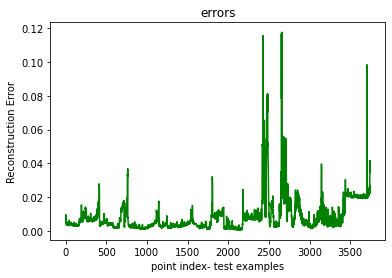

In [20]:
# data to be plotted
x = np.arange(1,len(BigX)+1)
#print(x)
#print(num_examples_test)

# plotting
plt.title("errors")
plt.xlabel("point index- test examples")
plt.ylabel("Reconstruction Error")
plt.plot(x, mse, color ="green")
plt.show()


orgfig = px.line(x=x, y=mse, title="training set",
                #   xaxis_title="point index- test examples for set:"+str(i),
                # yaxis_title="Reconstruction Error",
                    labels={
                     "x": "point index- train examples",
                     "y": "Reconstruction Error"
                 }
                  ) 
orgfig.show()

In [21]:
# train_x_predictions = autoencoder.predict(BigX)
# #print(test_data_normalised,test_x_predictions)
# #print(BigX)
# mse_train = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)

In [22]:
# x_train = np.arange(1, num_examples_train+1)
# #print(x)
# #print(num_examples_train)
 
# # plotting
# plt.title("errors")
# plt.xlabel("point index test examples")
# plt.ylabel("Reconstruction Error")
# plt.plot(x_train, mse_train, color ="green")
# plt.show()

In [23]:
# TestX=loadtxt("stripper_data_13b.txt")
# pprint(TestX)

In [24]:
Test_dict_1={}
for i in range (1,14):
    temp=loadtxt("./Stripper Circulation Testing 1/stripper_testing1_"+str(i)+".txt")
    Test_dict_1['Test1'+str(i)+'b']=scaling.transform(temp)
    
Test_dict_2={}
for i in range (1,14):
    temp=loadtxt("./Stripper Circulation Testing 2/stripper_testing2_"+str(i)+".txt")
    Test_dict_2['Test2'+str(i)+'b']=scaling.transform(temp)

    

In [25]:
test_predictions_1={}
for i in range(1,14):
    temp=autoencoder.predict(Test_dict_1['Test1'+str(i)+'b'])
    test_predictions_1['Test1'+str(i)+'b']=temp

test_predictions_2={}
for i in range(1,14):
    temp=autoencoder.predict(Test_dict_2['Test2'+str(i)+'b'])
    test_predictions_2['Test2'+str(i)+'b']=temp
    

# test_x_predictions = autoencoder.predict(TestX)

#print(test_data_normalised,test_x_predictions)
#print(TestX)
# mse2 = np.mean(np.power(TestX - test_x_predictions, 2), axis=1)
mse_1={}
for i in range(1,14):
    temp=np.mean(np.power(Test_dict_1['Test1'+str(i)+'b'] - test_predictions_1['Test1'+str(i)+'b'], 2), axis=1)
    mse_1['Test1'+str(i)+'b']=temp
    
mse_2={}
for i in range(1,14):
    temp=np.mean(np.power(Test_dict_2['Test2'+str(i)+'b'] - test_predictions_2['Test2'+str(i)+'b'], 2), axis=1)
    mse_2['Test2'+str(i)+'b']=temp

In [26]:
import plotly.express as px

In [27]:
# fig = px.line(df, x="x", y="y", title="Unsorted Input") 
# fig.show()

In [32]:
# data to be plotted
x_1={}
for i in range(1,14):
    x_1['Test1'+str(i)+'b'] = np.arange(1,len(Test_dict_1['Test1'+str(i)+'b'])+1)
    
x_2={}
for i in range(1,14):
    x_2['Test2'+str(i)+'b'] = np.arange(1,len(Test_dict_2['Test2'+str(i)+'b'])+1)
#print(x)
#print(num_examples_test)

# print("TESTING-1 plots")
# # plotting
# for i in range(1,14):
#     plt.title("errors")
#     plt.xlabel("point index- test examples for set:"+str(i))
#     plt.ylabel("Reconstruction Error")
#     plt.plot(x_1['Test1'+str(i)+'b'], mse_1['Test1'+str(i)+'b'], color ="green")
#     plt.show()
# # data to be plotted
# x_1={}
# for i in range(1,14):
#     x_1['Test1'+str(i)+'b'] = np.arange(1,len(Test_dict_1['Test1'+str(i)+'b'])+1)
    
# x_2={}
# for i in range(1,14):
#     x_2['Test2'+str(i)+'b'] = np.arange(1,len(Test_dict_2['Test2'+str(i)+'b'])+1)
# #print(x)
# #print(num_examples_test)


TESTING-1 plots


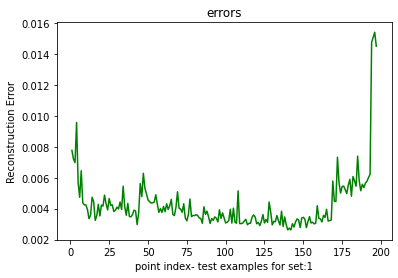

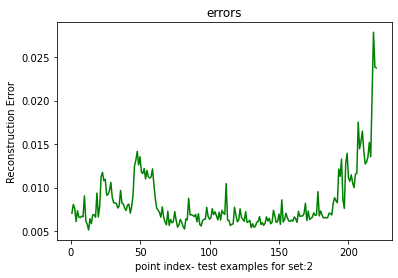

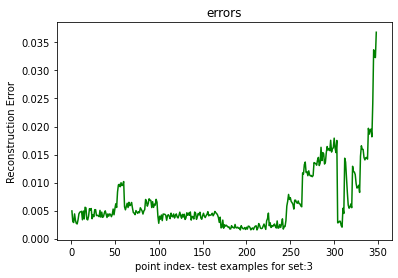

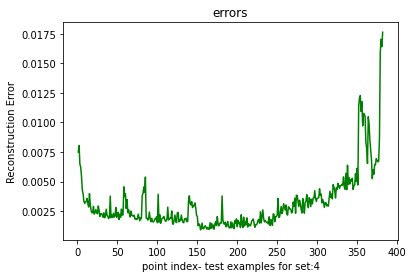

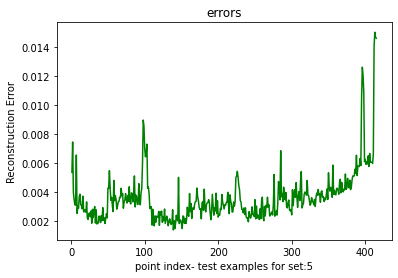

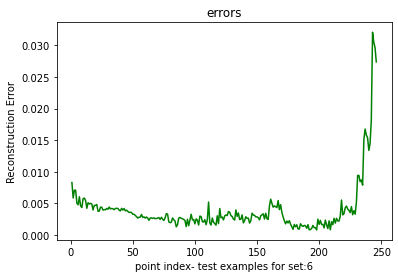

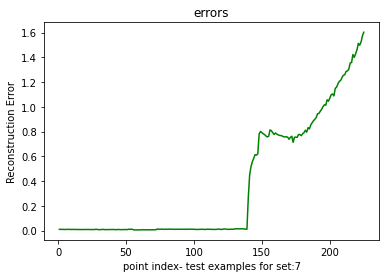

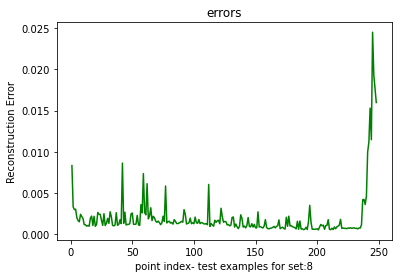

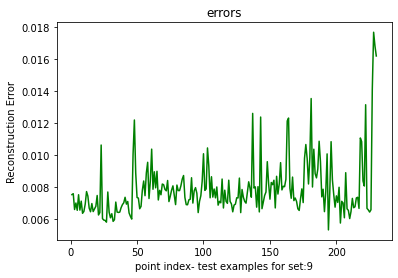

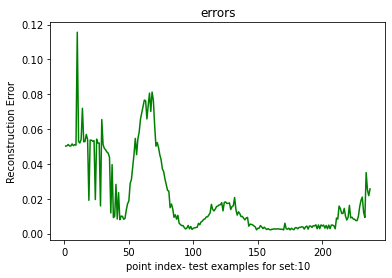

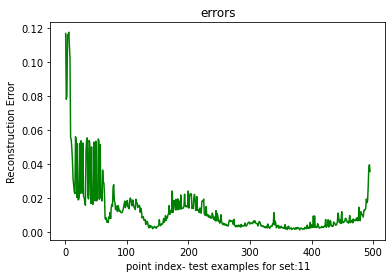

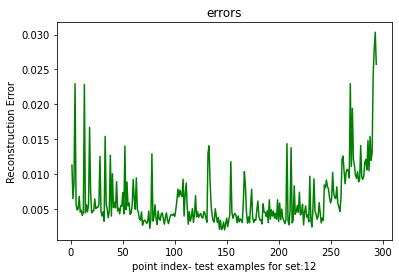

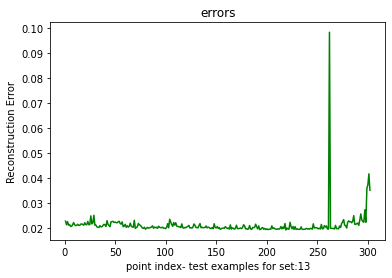

TESTING-2 plots


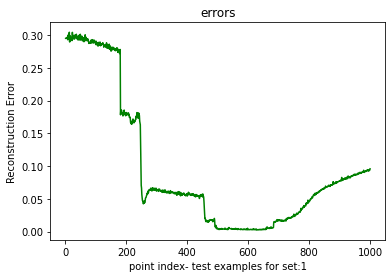

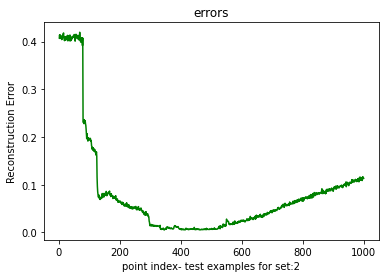

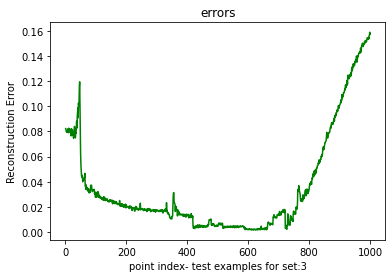

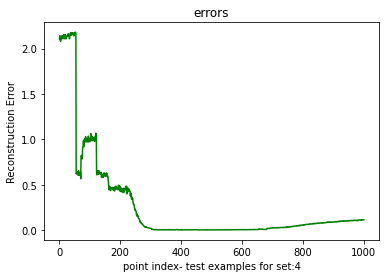

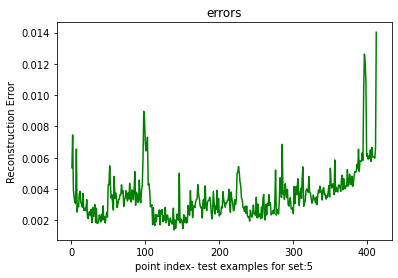

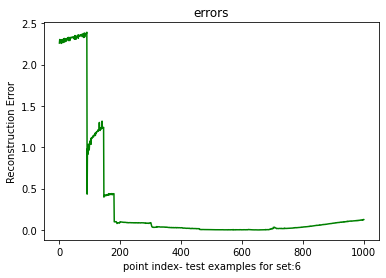

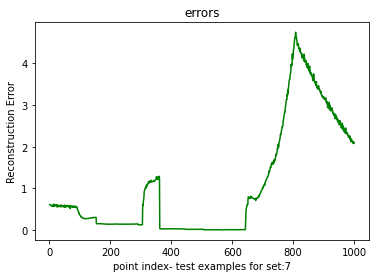

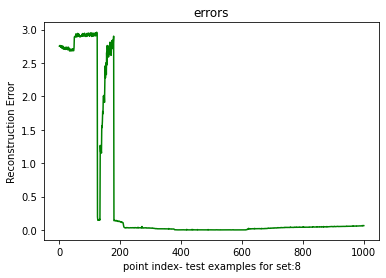

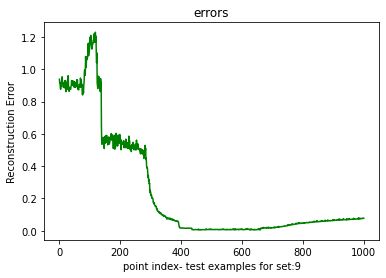

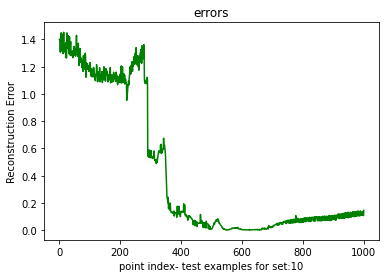

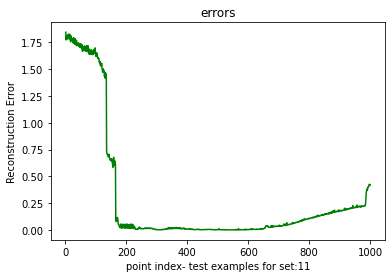

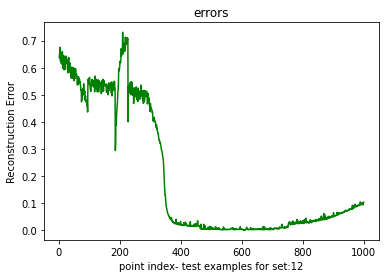

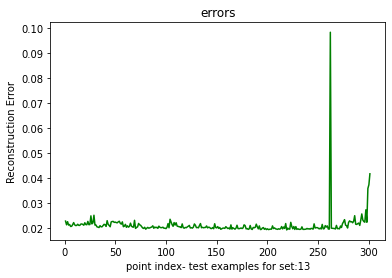

In [35]:

print("TESTING-1 plots")
# plotting
for i in range(1,14):
    plt.title("errors")
    plt.xlabel("point index- test examples for set:"+str(i))
    plt.ylabel("Reconstruction Error")
    plt.plot(x_1['Test1'+str(i)+'b'], mse_1['Test1'+str(i)+'b'], color ="green")
    plt.show()
    fig = px.line(x=x_1['Test1'+str(i)+'b'], y=mse_1['Test1'+str(i)+'b'], title="point index- test examples for set:"+str(i),
                #   xaxis_title="point index- test examples for set:"+str(i),
                # yaxis_title="Reconstruction Error",
                labels={
                     "x": "point index- test examples for set:"+str(i),
                     "y": "Reconstruction Error"
                 }
                  ) 
    fig.show()
    
print("TESTING-2 plots")
# plotting
for i in range(1,14):
    plt.title("errors")
    plt.xlabel("point index- test examples for set:"+str(i))
    plt.ylabel("Reconstruction Error")
    plt.plot(x_2['Test2'+str(i)+'b'], mse_2['Test2'+str(i)+'b'], color ="green")
    plt.show()
    fig = px.line(x=x_2['Test2'+str(i)+'b'], y=mse_2['Test2'+str(i)+'b'], title="point index- test examples for set:"+str(i),
                #   xaxis_title="point index- test examples for set:"+str(i),
                # yaxis_title="Reconstruction Error",
                    labels={
                     "x": "point index- test examples for set:"+str(i),
                     "y": "Reconstruction Error"
                 }
                  ) 
    fig.show()
    
# print("all testings together")
# # plotting
# for i in range(1,14):
#     plt.title("errors")
#     plt.xlabel("point index- test examples for set:"+str(i))
#     plt.ylabel("Reconstruction Error")
#     plt.plot(x_2['Test2'+str(i)+'b'], mse_2['Test2'+str(i)+'b'], color ="green")
#     plt.show()
#     fig = px.line(x=x_2['Test2'+str(i)+'b'], y=mse_2['Test2'+str(i)+'b'], title="point index- test examples for set:"+str(i),
#                 #   xaxis_title="point index- test examples for set:"+str(i),
#                 # yaxis_title="Reconstruction Error",
#                     labels={
#                      "x": "point index- test examples for set:"+str(i),
#                      "y": "Reconstruction Error"
#                  }
#                   ) 
#     fig.show()
    

In [29]:
#autoencoder.save("combined_all_train")

In [30]:
#autoencoder.save("combined_all_removed_stark_high_vals")